<font size="+5">#08. Hyperparameter Tuning with Cross Validation</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - We take some dataset from the _[Machine Learning Data Repository UCI](https://archive.ics.uci.edu/ml/datasets/adult)_
> - The aim is to predict weather a **person** (rows) `earned>50k` a year or not
> - Based on their **social-demographic features** (columns)

Esta tabla resume la información de personas que ganan más de 50,000 al año o menos. Por tanto, nuestro objetivo es desarrollar un modelo que calcule mejor si una persona gana por encima o por debajo de dicho umbral. La columna a predecir es la última.
>
> PD: You may see the column names & meanings [here ↗](https://archive.ics.uci.edu/ml/datasets/adult).

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, na_values=' ?')
df.rename(columns={14: 'target'}, inplace=True)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
df=df.dropna()
df=pd.get_dummies(df,drop_first=True)
df.head(10)

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,49,160187,5,0,0,16,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8,31,45781,14,14084,0,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9,42,159449,13,5178,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Feature Selection

> 1. Class/Labels/Dependent/`Target` `y`
> 2. Independents/Features/Characteristics/`Explanatory` `X`

In [3]:
y=df['target_ >50K']

In [4]:
X=df.drop(columns='target_ >50K')

# Data Preprocessing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

# `DecisionTreeClassifier()` with Default Hyperparameters

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [8]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

## Accuracy

> - `model.score()`
>
> In `train` data

In [9]:
dtc.score(X_train,y_train)

1.0

> In `test` data

In [10]:
dtc.score(X_test,y_test)

0.8124372111713883

## Model Visualization

> - We'll use `plot_tree()`, located within `tree` module from `sklearn` library
> - You may use `shift + tab` to ask `Python` how the function `plot_tree()` works

[Text(192.45344594594596, 205.35999999999999, '5_ Married-civ-spouse <= 0.5\ngini = 0.372\nsamples = 20208\nvalue = [15214, 4994]'),
 Text(115.5964864864865, 181.2, '10 <= 7073.5\ngini = 0.126\nsamples = 10822\nvalue = [10093, 729]'),
 Text(80.98540540540542, 157.04, '4 <= 12.5\ngini = 0.095\nsamples = 10616\nvalue = [10088, 528]'),
 Text(47.50540540540541, 132.88, '11 <= 2218.5\ngini = 0.048\nsamples = 8465\nvalue = [8257, 208]'),
 Text(28.95567567567568, 108.72, '12 <= 40.5\ngini = 0.044\nsamples = 8426\nvalue = [8237, 189]'),
 Text(14.47783783783784, 84.56, '0 <= 33.5\ngini = 0.027\nsamples = 6843\nvalue = [6750, 93]'),
 Text(7.23891891891892, 60.400000000000006, '4 <= 10.5\ngini = 0.007\nsamples = 3994\nvalue = [3980, 14]'),
 Text(3.61945945945946, 36.24000000000001, '6_ Protective-serv <= 0.5\ngini = 0.004\nsamples = 3699\nvalue = [3691, 8]'),
 Text(1.80972972972973, 12.079999999999984, '\n  (...)  \n'),
 Text(5.42918918918919, 12.079999999999984, '\n  (...)  \n'),
 Text(10.858378

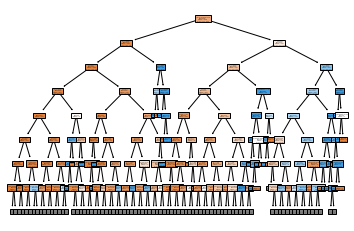

In [11]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=dtc, max_depth=7, feature_names=X.columns, filled=True)

## Interpretation

> - Why the difference on accuracy is so much?

# `DecisionTreeClassifier()` with Custom Hyperparameters

> - The `model` has this hyperparameters ↓

In [12]:
model = DecisionTreeClassifier(max_depth=3)

In [13]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## 1st Configuration

In [14]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Accuracy

> In `train` data

In [15]:
model.score(X_train,y_train)

0.8401623119556612

> In `test` data

In [16]:
model.score(X_test,y_test)

0.8404661442636127

### Model Visualization

> - `plot_tree()`

[Text(167.4, 190.26, '5_ Married-civ-spouse <= 0.5\ngini = 0.372\nsamples = 20208\nvalue = [15214, 4994]'),
 Text(83.7, 135.9, '10 <= 7073.5\ngini = 0.126\nsamples = 10822\nvalue = [10093, 729]'),
 Text(41.85, 81.53999999999999, '4 <= 12.5\ngini = 0.095\nsamples = 10616\nvalue = [10088, 528]'),
 Text(20.925, 27.180000000000007, 'gini = 0.048\nsamples = 8465\nvalue = [8257, 208]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.253\nsamples = 2151\nvalue = [1831, 320]'),
 Text(125.55000000000001, 81.53999999999999, '10 <= 7669.5\ngini = 0.047\nsamples = 206\nvalue = [5, 201]'),
 Text(104.625, 27.180000000000007, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(146.475, 27.180000000000007, 'gini = 0.01\nsamples = 195\nvalue = [1, 194]'),
 Text(251.10000000000002, 135.9, '4 <= 12.5\ngini = 0.496\nsamples = 9386\nvalue = [5121, 4265]'),
 Text(209.25, 81.53999999999999, '10 <= 5095.5\ngini = 0.449\nsamples = 6561\nvalue = [4331, 2230]'),
 Text(188.32500000000002, 27.18000000000

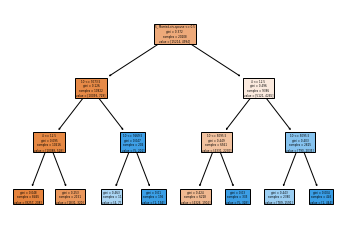

In [17]:
plot_tree(decision_tree=model,max_depth=5,feature_names=X.columns,filled=True)

## 2nd Configuration

In [18]:
model=DecisionTreeClassifier(max_depth=5)

In [19]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [20]:
model.score(X_train,y_train)

0.842735550277118

In [21]:
model.score(X_test,y_test)

0.8404661442636127

[Text(169.81442307692308, 199.32, '5_ Married-civ-spouse <= 0.5\ngini = 0.372\nsamples = 20208\nvalue = [15214, 4994]'),
 Text(86.91923076923078, 163.07999999999998, '10 <= 7073.5\ngini = 0.126\nsamples = 10822\nvalue = [10093, 729]'),
 Text(51.50769230769231, 126.83999999999999, '4 <= 12.5\ngini = 0.095\nsamples = 10616\nvalue = [10088, 528]'),
 Text(25.753846153846155, 90.6, '11 <= 2218.5\ngini = 0.048\nsamples = 8465\nvalue = [8257, 208]'),
 Text(12.876923076923077, 54.359999999999985, '12 <= 40.5\ngini = 0.044\nsamples = 8426\nvalue = [8237, 189]'),
 Text(6.438461538461539, 18.119999999999976, 'gini = 0.027\nsamples = 6843\nvalue = [6750, 93]'),
 Text(19.315384615384616, 18.119999999999976, 'gini = 0.114\nsamples = 1583\nvalue = [1487, 96]'),
 Text(38.63076923076923, 54.359999999999985, '2 <= 125411.0\ngini = 0.5\nsamples = 39\nvalue = [20, 19]'),
 Text(32.19230769230769, 18.119999999999976, 'gini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(45.06923076923077, 18.119999999999976

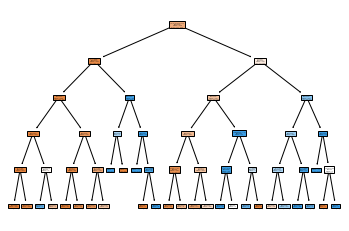

In [22]:
plot_tree(decision_tree=model,max_depth=10,feature_names=X.columns,filled=True)

## 3rd Configuration

In [23]:
model=DecisionTreeClassifier(max_depth=10)

In [24]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [25]:
model.score(X_train,y_train)

0.8697545526524149

In [26]:
model.score(X_test,y_test)

0.8492063492063492

[Text(195.4289960369881, 207.55636363636364, '5_ Married-civ-spouse <= 0.5\ngini = 0.372\nsamples = 20208\nvalue = [15214, 4994]'),
 Text(111.4871284676354, 187.7890909090909, '10 <= 7073.5\ngini = 0.126\nsamples = 10822\nvalue = [10093, 729]'),
 Text(78.79354359313078, 168.0218181818182, '4 <= 12.5\ngini = 0.095\nsamples = 10616\nvalue = [10088, 528]'),
 Text(48.484081902245705, 148.25454545454545, '11 <= 2218.5\ngini = 0.048\nsamples = 8465\nvalue = [8257, 208]'),
 Text(32.83870541611625, 128.48727272727274, '12 <= 40.5\ngini = 0.044\nsamples = 8426\nvalue = [8237, 189]'),
 Text(18.79656538969617, 108.72, '0 <= 33.5\ngini = 0.027\nsamples = 6843\nvalue = [6750, 93]'),
 Text(10.83566710700132, 88.95272727272729, '4 <= 10.5\ngini = 0.007\nsamples = 3994\nvalue = [3980, 14]'),
 Text(6.634081902245707, 69.18545454545455, '6_ Protective-serv <= 0.5\ngini = 0.004\nsamples = 3699\nvalue = [3691, 8]'),
 Text(3.5381770145310436, 49.418181818181836, '13_ Guatemala <= 0.5\ngini = 0.003\nsamples

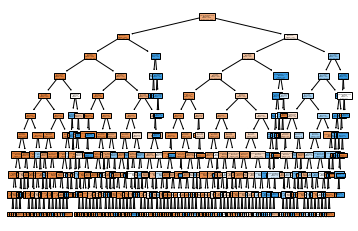

In [27]:
plot_tree(decision_tree=model,max_depth=10,feature_names=X.columns,filled=True)

## 4th Configuration

In [28]:
model=DecisionTreeClassifier(min_samples_leaf=200)

In [29]:
model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=200)

In [30]:
model.score(X_train,y_train)

0.8472882026920031

In [31]:
model.score(X_test,y_test)

0.8452883263009845

[Text(185.44110576923077, 208.38, '5_ Married-civ-spouse <= 0.5\ngini = 0.372\nsamples = 20208\nvalue = [15214, 4994]'),
 Text(108.91730769230769, 190.26, '10 <= 7073.5\ngini = 0.126\nsamples = 10822\nvalue = [10093, 729]'),
 Text(104.625, 172.14, '4 <= 12.5\ngini = 0.095\nsamples = 10616\nvalue = [10088, 528]'),
 Text(69.75, 154.01999999999998, '12 <= 40.5\ngini = 0.048\nsamples = 8465\nvalue = [8257, 208]'),
 Text(42.92307692307692, 135.89999999999998, '0 <= 33.5\ngini = 0.029\nsamples = 6864\nvalue = [6763, 101]'),
 Text(25.753846153846155, 117.77999999999999, '4 <= 10.5\ngini = 0.008\nsamples = 4000\nvalue = [3984, 16]'),
 Text(21.46153846153846, 99.66, '0 <= 26.5\ngini = 0.005\nsamples = 3705\nvalue = [3695, 10]'),
 Text(12.876923076923077, 81.53999999999999, '2 <= 164847.5\ngini = 0.002\nsamples = 2710\nvalue = [2707, 3]'),
 Text(8.584615384615384, 63.41999999999999, '0 <= 21.5\ngini = 0.006\nsamples = 1040\nvalue = [1037, 3]'),
 Text(4.292307692307692, 45.29999999999998, 'gini =

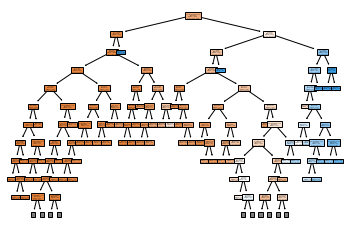

In [32]:
plot_tree(decision_tree=model,max_depth=10,feature_names=X.columns,filled=True)

## 5th Configuration

# `GridSearchCV()` to find Best Hyperparameters

> - How many scores for each fold?

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

In [33]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()

In [34]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [35]:
cv=GridSearchCV(estimator=dtc,param_grid={'max_depth': [4,5,6,7,8,9,10]}, cv=5, verbose=1)

In [36]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10]}, verbose=1)

In [37]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=9)

In [38]:
cv.score(X_test,y_test)

0.8501105083383564

# Other Models

## Support Vector Machines `SVC()`

> - https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [39]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [39]:
from sklearn.svm import SVC

In [40]:
svm=SVC()

In [41]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [42]:
cv=GridSearchCV(estimator=svm,param_grid={'C': [0.1,1,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf','sigmoid']},verbose=1)

In [ ]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
cv.best_estimator_

In [ ]:
cv.score(X_test,y_test)

## `KNeighborsClassifier()`

In [ ]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knc=KNeighborsClassifier()

In [42]:
knc.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [45]:
cv=GridSearchCV(estimator=knc,param_grid={'n_neighbors':[3,5,11,19],'weights':['uniform','distance'],'metric':['minkowski']},cv=2,verbose=1)

In [46]:
cv.fit(X_train,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski'], 'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [47]:
cv.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [48]:
cv.score(X_test,y_test)

0.7847096644564999

# Best Model with Best Hyperparameters

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Even a model can be bettered
- [ ] The goal is to make models that perform a better accuracy on data not seen
    - The banks would like to know if a **future client** will be able to pay the loan
    - Not a past client
    - Unfortunately, we do not have data for future clients
    - So, we fix this with `Data Splitting` into
        - Train
            - Fold Validation
        - Test
- [ ] Understand the Machine Learning Applications to businesses
    - To predict if a customer will pay the loan
    - To predict if an athlete will have an injury